In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/My Drive/Python for Exploratory Data Analysis"

 ClimateDataEDA.ipynb		'Python for EDA Workshop.gslides'
 KPHX.csv			 titanic.csv
 properties.csv			 titanic.ipynb
 propertyDataAnalysis_NY.ipynb	 weatherdata_phx.ipynb


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
#Load the dataset
property_data = pd.read_csv("/content/gdrive/My Drive/Python for Exploratory Data Analysis/properties.csv")

EXPLORING THE DATA

In [ ]:
property_data.head(10)

,title,address,city,state,postal_code,price,facts and features,real estate provider,url
0,Condo For Sale,515 W 29th St APT 3N,New York,NY,10001,"$5,250,000","2 bds , 3 ba , 2,133 sqft",NaN,https://www.zillow.com/homedetails/515-W-29th-...
1,Condo For Sale,515 W 29th St APT 3S,New York,NY,10001,"$5,450,000","2 bds , 3 ba , 2,140 sqft",NaN,https://www.zillow.com/homedetails/515-W-29th-...
2,Condo For Sale,515 W 29th St APT 5S,New York,NY,10001,"$5,750,000","2 bds , 3 ba , 2,140 sqft",NaN,https://www.zillow.com/homedetails/515-W-29th-...
3,Condo For Sale,357 W 30TH St APT 2,NEW YORK,NY,10001,"$675,000","Studio , 1 ba , 453 sqft",Halstead Property,https://www.zillow.com/homedetails/357-W-30TH-...
4,Condo For Sale,520 W 28th St # 5,New York,NY,10001,"$6,450,000","3 bds , 4 ba , 2,065 sqft",NaN,https://www.zillow.com/homedetails/520-W-28th-...
5,Condo For Sale,261 W 25th St # 6A,New York,NY,10001,"$1,460,000","1 bd , 1 ba , 720 sqft",NaN,https://www.zillow.com/homedetails/261-W-25th-...
6,Condo For Sale,252 7TH Ave APT 10V,NEW YORK,NY,10001,"$2,875,000","2 bds , 2 ba , 1,478 sqft",NaN,https://www.zillow.com/homedetails/252-7TH-Ave...
7,Co-op For Sale,133 W 28th St APT 7B,New York,NY,10001,"$1,150,000","1 bd , 1 ba , 900 sqft",Compass,https://www.zillow.com/homedetails/133-W-28th-...
8,Condo For Sale,1182 Broadway APT 12B,New York,NY,10001,"$2,450,000","1 bd , 1 ba , 879 sqft",Douglas Elliman,https://www.zillow.com/homedetails/1182-Broadw...
9,Condo For Sale,520 W 28th St # 34,New York,NY,10001,"$16,000,000","4 bds , 5 ba , 4,023 sqft",NaN,https://www.zillow.com/homedetails/520-W-28th-...


In [ ]:
property_data.shape

(183, 9)

In [ ]:
property_data.describe()

,postal_code
count,183.000000
mean,10002.464481
std,1.137568
min,10001.000000
25%,10001.000000
50%,10002.000000
75%,10003.500000
max,10004.000000


In [ ]:
property_data.dtypes #all are strings to get a good read on the data need to convert them to numeric

title                   object
address                 object
city                    object
state                   object
postal_code              int64
price                   object
facts and features      object
real estate provider    object
url                     object
dtype: object

In [ ]:
property_data.isnull().sum() #other than real estate provider no other have null values

title                     0
address                   0
city                      0
state                     0
postal_code               0
price                     0
facts and features        0
real estate provider    104
url                       0
dtype: int64

In [ ]:
#backup copy before i make any changes
property_data_copy = property_data.copy()

In [ ]:
#I am going to try and answer these questions with this data:
#The price in relation to how many beds, baths and square feet
#the Price is relation to the type of the property
#The price in relation to the city and zipcode.

DATA CLEANING

In [ ]:
#drop the url and real estate provider
property_data = property_data.drop(['url','real estate provider'],axis=1)

#city to lower case
property_data['city'] = property_data['city'].str.lower()

In [ ]:
property_data.head()

,title,address,city,state,postal_code,price,facts and features
0,Condo For Sale,515 W 29th St APT 3N,new york,NY,10001,"$5,250,000","2 bds , 3 ba , 2,133 sqft"
1,Condo For Sale,515 W 29th St APT 3S,new york,NY,10001,"$5,450,000","2 bds , 3 ba , 2,140 sqft"
2,Condo For Sale,515 W 29th St APT 5S,new york,NY,10001,"$5,750,000","2 bds , 3 ba , 2,140 sqft"
3,Condo For Sale,357 W 30TH St APT 2,new york,NY,10001,"$675,000","Studio , 1 ba , 453 sqft"
4,Condo For Sale,520 W 28th St # 5,new york,NY,10001,"$6,450,000","3 bds , 4 ba , 2,065 sqft"


In [ ]:
#Creating new columns to splt out the features.
new = property_data["facts and features"].str.split(', ', n=2,expand=True)

In [ ]:
property_data['beds'] = new[0]
property_data['baths'] = new[1]
property_data['sqft'] = new[2]

In [ ]:
property_data.head()

,title,address,city,state,postal_code,price,facts and features,beds,baths,sqft
0,Condo For Sale,515 W 29th St APT 3N,new york,NY,10001,"$5,250,000","2 bds , 3 ba , 2,133 sqft",2 bds,3 ba,"2,133 sqft"
1,Condo For Sale,515 W 29th St APT 3S,new york,NY,10001,"$5,450,000","2 bds , 3 ba , 2,140 sqft",2 bds,3 ba,"2,140 sqft"
2,Condo For Sale,515 W 29th St APT 5S,new york,NY,10001,"$5,750,000","2 bds , 3 ba , 2,140 sqft",2 bds,3 ba,"2,140 sqft"
3,Condo For Sale,357 W 30TH St APT 2,new york,NY,10001,"$675,000","Studio , 1 ba , 453 sqft",Studio,1 ba,453 sqft
4,Condo For Sale,520 W 28th St # 5,new york,NY,10001,"$6,450,000","3 bds , 4 ba , 2,065 sqft",3 bds,4 ba,"2,065 sqft"


In [ ]:
#Number of beds
property_data['beds'] = property_data['beds'].map(lambda x: x.rstrip(' bds'))

#number of baths
property_data['baths'] = property_data['baths'].map(lambda x: x.rstrip(' ba'))

#square ft
property_data['sqft'] = property_data['sqft'].map(lambda x: x.rstrip(' sqft'))

In [ ]:
property_data.head()

,title,address,city,state,postal_code,price,facts and features,beds,baths,sqft
0,Condo For Sale,515 W 29th St APT 3N,new york,NY,10001,"$5,250,000","2 bds , 3 ba , 2,133 sqft",2,3,"2,133"
1,Condo For Sale,515 W 29th St APT 3S,new york,NY,10001,"$5,450,000","2 bds , 3 ba , 2,140 sqft",2,3,"2,140"
2,Condo For Sale,515 W 29th St APT 5S,new york,NY,10001,"$5,750,000","2 bds , 3 ba , 2,140 sqft",2,3,"2,140"
3,Condo For Sale,357 W 30TH St APT 2,new york,NY,10001,"$675,000","Studio , 1 ba , 453 sqft",Studio,1,453
4,Condo For Sale,520 W 28th St # 5,new york,NY,10001,"$6,450,000","3 bds , 4 ba , 2,065 sqft",3,4,"2,065"


In [ ]:
property_data.dtypes

title                 object
address               object
city                  object
state                 object
postal_code            int64
price                 object
facts and features    object
beds                  object
baths                 object
sqft                  object
dtype: object

FEATURE TRANSFORMATIONS

In [ ]:
#since now we don't need facts and features drop the column
property_data = property_data.drop(['facts and features'],axis=1)

In [ ]:
property_data.head()

,title,address,city,state,postal_code,price,beds,baths,sqft
0,Condo For Sale,515 W 29th St APT 3N,new york,NY,10001,"$5,250,000",2,3,"2,133"
1,Condo For Sale,515 W 29th St APT 3S,new york,NY,10001,"$5,450,000",2,3,"2,140"
2,Condo For Sale,515 W 29th St APT 5S,new york,NY,10001,"$5,750,000",2,3,"2,140"
3,Condo For Sale,357 W 30TH St APT 2,new york,NY,10001,"$675,000",Studio,1,453
4,Condo For Sale,520 W 28th St # 5,new york,NY,10001,"$6,450,000",3,4,"2,065"


In [ ]:
property_data['beds'] = property_data['beds'].apply(lambda x: '0' if x=='Studio' else x)

In [ ]:
property_data.head()

,title,address,city,state,postal_code,price,beds,baths,sqft
0,Condo For Sale,515 W 29th St APT 3N,new york,NY,10001,"$5,250,000",2,3,"2,133"
1,Condo For Sale,515 W 29th St APT 3S,new york,NY,10001,"$5,450,000",2,3,"2,140"
2,Condo For Sale,515 W 29th St APT 5S,new york,NY,10001,"$5,750,000",2,3,"2,140"
3,Condo For Sale,357 W 30TH St APT 2,new york,NY,10001,"$675,000",0,1,453
4,Condo For Sale,520 W 28th St # 5,new york,NY,10001,"$6,450,000",3,4,"2,065"


In [ ]:
property_data['beds'] = pd.to_numeric(property_data['beds'])

In [ ]:
property_data['baths'] = pd.to_numeric(property_data['baths'])

In [ ]:
property_data['sqft'].value_counts()

--       46
800       5
400       4
1,100     3
1,690     3
         ..
1,734     1
1,250     1
798       1
1,175     1
940       1
Name: sqft, Length: 95, dtype: int64

In [ ]:
property_data['sqft'] = property_data['sqft'].apply(lambda x: '0' if x=='--' else x)

In [ ]:
property_data['sqft'] = pd.to_numeric(property_data['sqft'].str.split(',').str.join(''))

In [ ]:
#To remove the $ from price.
property_data['price'] = property_data['price'].map(lambda x: x.lstrip('$'))
property_data.head()

,title,address,city,state,postal_code,price,beds,baths,sqft
0,Condo For Sale,515 W 29th St APT 3N,new york,NY,10001,"5,250,000",2,3,2133
1,Condo For Sale,515 W 29th St APT 3S,new york,NY,10001,"5,450,000",2,3,2140
2,Condo For Sale,515 W 29th St APT 5S,new york,NY,10001,"5,750,000",2,3,2140
3,Condo For Sale,357 W 30TH St APT 2,new york,NY,10001,"675,000",0,1,453
4,Condo For Sale,520 W 28th St # 5,new york,NY,10001,"6,450,000",3,4,2065


In [ ]:
property_data['price'] = pd.to_numeric(property_data['price'].str.split(',').str.join('')) #removing the commas and converting the columns to numeric

In [ ]:
property_data.dtypes

title          object
address        object
city           object
state          object
postal_code     int64
price           int64
beds            int64
baths           int64
sqft            int64
dtype: object

In [ ]:
#To get the type of property for sale from title.
new_type = property_data["title"].str.split(' ', n=2,expand=True)

In [ ]:
property_data['type'] = new_type[0]
property_data.head()

,title,address,city,state,postal_code,price,beds,baths,sqft,type
0,Condo For Sale,515 W 29th St APT 3N,new york,NY,10001,5250000,2,3,2133,Condo
1,Condo For Sale,515 W 29th St APT 3S,new york,NY,10001,5450000,2,3,2140,Condo
2,Condo For Sale,515 W 29th St APT 5S,new york,NY,10001,5750000,2,3,2140,Condo
3,Condo For Sale,357 W 30TH St APT 2,new york,NY,10001,675000,0,1,453,Condo
4,Condo For Sale,520 W 28th St # 5,new york,NY,10001,6450000,3,4,2065,Condo


In [ ]:
property_data['type'].value_counts()

Condo          102
Co-op           73
For              3
Apartment        3
Foreclosure      2
Name: type, dtype: int64

In [ ]:
#I see 'For' as a type, let's figure why that is.
property_data[property_data['type'] =='For']

,title,address,city,state,postal_code,price,beds,baths,sqft,type
93,For Sale by Owner,210 East Broadway APT H1404,new york,NY,10002,789000,1,1,821,For
97,For Sale by Owner,41 5th Ave # EIGHT-F,new york,NY,10003,1488888,1,1,0,For
99,For Sale by Owner,7 E 14th St APT 1228,new york,NY,10003,899000,1,1,725,For


4 of the Title do not have the type, since the sqft is quite less I am going to assume these are condos too and impute them as condos.

In [ ]:
property_data['type'] = property_data['type'].apply(lambda x: 'Condo' if x=='For' else x)

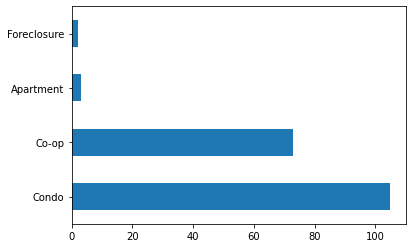

In [ ]:
property_data['type'].value_counts().plot(kind='barh') #plotting the different types of properties as a bar graph in horizontal

In [ ]:
property_data = property_data.drop('title',axis=1)

In [ ]:
property_data.head()

,address,city,state,postal_code,price,beds,baths,sqft,type
0,515 W 29th St APT 3N,new york,NY,10001,5250000,2,3,2133,Condo
1,515 W 29th St APT 3S,new york,NY,10001,5450000,2,3,2140,Condo
2,515 W 29th St APT 5S,new york,NY,10001,5750000,2,3,2140,Condo
3,357 W 30TH St APT 2,new york,NY,10001,675000,0,1,453,Condo
4,520 W 28th St # 5,new york,NY,10001,6450000,3,4,2065,Condo


In [ ]:
#how many unique zipcodes
property_data['postal_code'].unique()

array([10001, 10002, 10003, 10004])

In [ ]:
#number of unique post codes
print("Number of unique postal codes: ", property_data['postal_code'].nunique())

Number of unique postal codes:  4


In [ ]:
property_data.dtypes

address         object
city            object
state           object
postal_code      int64
price          float64
beds             int64
baths            int64
sqft             int64
type            object
dtype: object

In [ ]:
property_data.describe() #after the feature transformation we have descriptive statistics

,postal_code,price,beds,baths,sqft
count,183.000000,1.830000e+02,183.000000,183.000000,183.000000
mean,10002.464481,1.787508e+06,1.300546,1.557377,850.836066
std,1.137568,2.122731e+06,1.065106,1.003148,800.674390
min,10001.000000,2.995000e+05,0.000000,1.000000,0.000000
25%,10001.000000,6.900000e+05,1.000000,1.000000,192.500000
50%,10002.000000,9.950000e+05,1.000000,1.000000,725.000000
75%,10003.500000,2.222000e+06,2.000000,2.000000,1162.000000
max,10004.000000,1.609500e+07,5.000000,6.000000,4220.000000


VISUALIZATIONS

In [ ]:
#To count the properties available per zip code
count = property_data['postal_code'].value_counts()

Text(0.5, 1.0, 'Properties available per postal code')

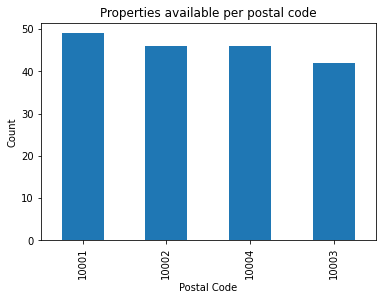

In [ ]:
property_data['postal_code'].value_counts().plot(kind='bar')
plt.xlabel('Postal Code')
plt.ylabel('Count')
plt.title('Properties available per postal code')

In [ ]:
property_data['sqft'].value_counts()

0       46
800      5
400      4
1100     3
1690     3
        ..
1734     1
1250     1
798      1
1175     1
940      1
Name: sqft, Length: 95, dtype: int64

In [ ]:
property_data.head()

,address,city,state,postal_code,price,beds,baths,sqft,type
0,515 W 29th St APT 3N,new york,NY,10001,5250000,2,3,2133,Condo
1,515 W 29th St APT 3S,new york,NY,10001,5450000,2,3,2140,Condo
2,515 W 29th St APT 5S,new york,NY,10001,5750000,2,3,2140,Condo
3,357 W 30TH St APT 2,new york,NY,10001,675000,0,1,453,Condo
4,520 W 28th St # 5,new york,NY,10001,6450000,3,4,2065,Condo


In [ ]:
property_data.head()

,address,city,state,postal_code,price,beds,baths,sqft,type
0,515 W 29th St APT 3N,new york,NY,10001,5250000.0,2,3,2133,Condo
1,515 W 29th St APT 3S,new york,NY,10001,5450000.0,2,3,2140,Condo
2,515 W 29th St APT 5S,new york,NY,10001,5750000.0,2,3,2140,Condo
3,357 W 30TH St APT 2,new york,NY,10001,675000.0,0,1,453,Condo
4,520 W 28th St # 5,new york,NY,10001,6450000.0,3,4,2065,Condo


In [ ]:
#converting price to float for statistics purposes.
property_data['price'] = property_data['price'].astype('float')

In [ ]:
property_data['price'].dtypes

dtype('float64')

In [ ]:
property_data.groupby(['postal_code','beds','baths'])['price'].mean()

postal_code  beds  baths
10001        0     1        6.860714e+05
             1     1        1.451652e+06
                   2        1.433333e+06
             2     1        1.064333e+06
                   2        2.923333e+06
                   3        4.861250e+06
             3     3        2.550000e+06
                   4        6.200000e+06
             4     5        1.600000e+07
             5     5        9.750000e+06
10002        0     1        5.300000e+05
             1     1        7.951875e+05
                   2        2.650000e+06
             2     1        7.311818e+05
                   2        2.307625e+06
             3     2        3.513000e+06
                   3        4.201333e+06
                   4        6.605000e+06
             5     6        1.609500e+07
10003        0     1        5.250000e+05
             1     1        9.504073e+05
                   2        3.250000e+06
             2     2        2.531500e+06
                   3        3.95

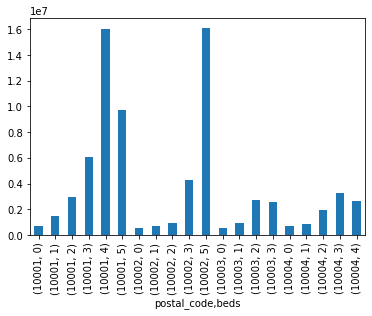

In [ ]:
property_data.groupby(['postal_code','beds'])['price'].median().plot(kind='bar')

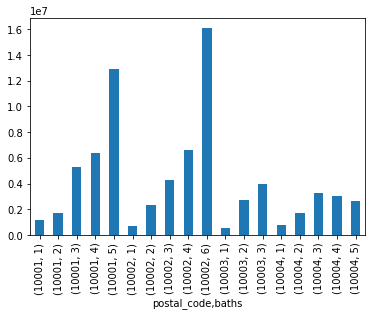

In [ ]:
property_data.groupby(['postal_code','baths'])['price'].median().plot(kind='bar')

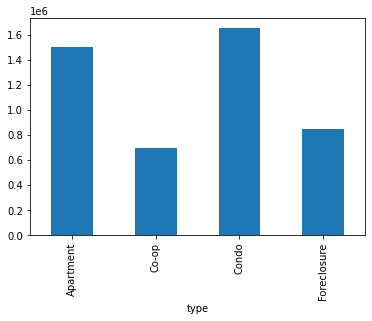

In [ ]:
property_data.groupby(['type'])['price'].median().plot(kind='bar')

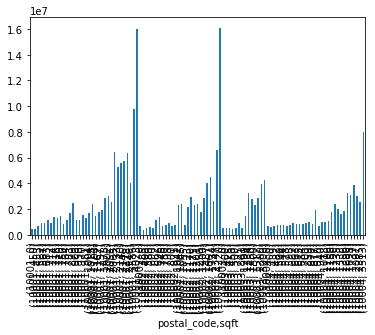

In [ ]:
property_data.groupby(['postal_code','sqft'])['price'].median().plot(kind='bar')

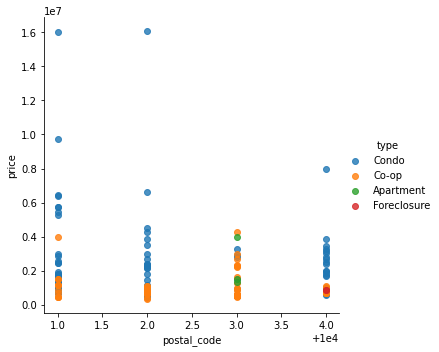

In [ ]:
# Scatterplot arguments
sns.lmplot(x='postal_code', y='price', data=property_data,
           fit_reg=False, # No regression line
           hue='type')

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


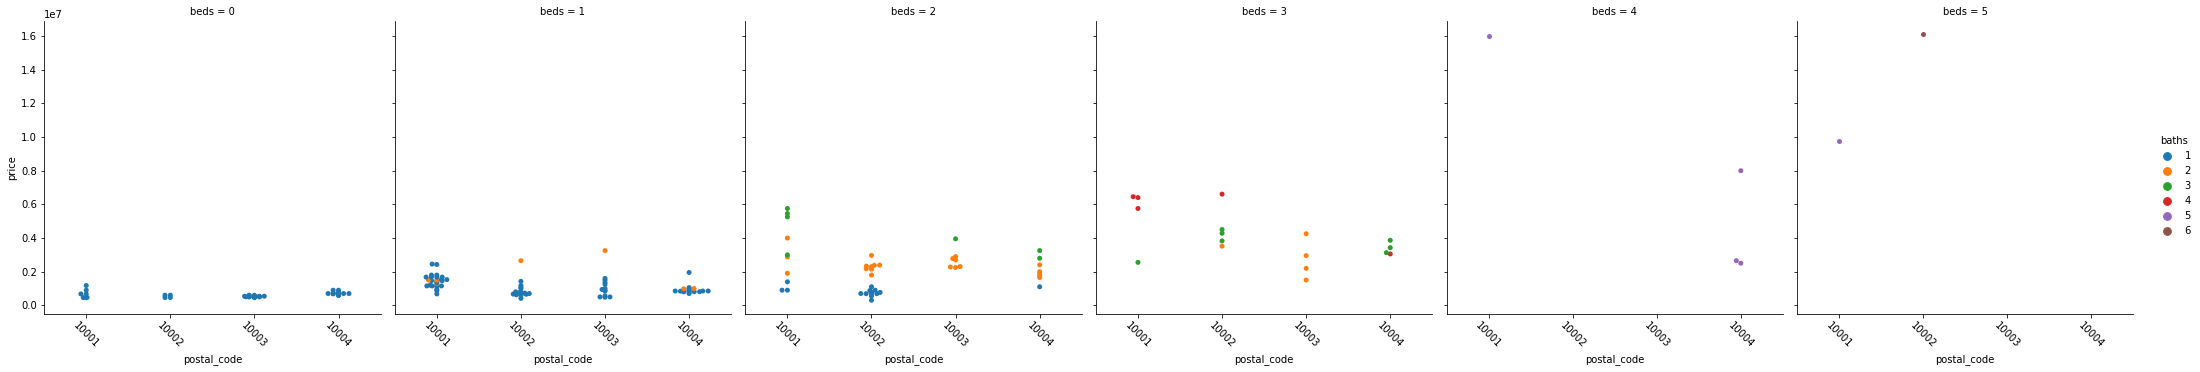

In [ ]:
g = sns.factorplot(x='postal_code',
                   y='price',
                   data=property_data,
                   hue='baths',  # Color by baths
                   col='beds',  # Separate by beds
                   kind='swarm') # Swarmplot

# Rotate x-axis labels
g.set_xticklabels(rotation=-45)

CORRELATION

In [ ]:
property_corr = property_data.corr()

In [ ]:
property_corr['price'].sort_values()

postal_code   -0.181742
beds           0.720270
sqft           0.824686
baths          0.844189
price          1.000000
Name: price, dtype: float64

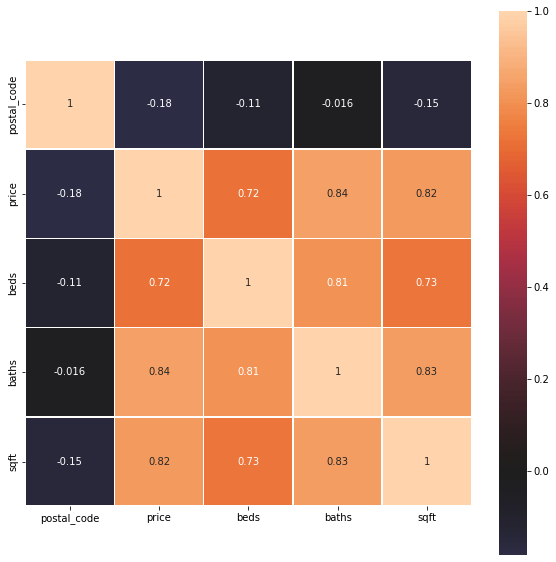

In [ ]:
from IPython.core.pylabtools import figsize
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(property_corr,vmax=1.0, linewidths=0.5, annot=True,square=True, center=0)